# This is my notebook for working with AER Snapshots

In [1]:
from qiskit import QuantumCircuit, Aer, BasicAer, transpile
from qiskit.compiler import assemble

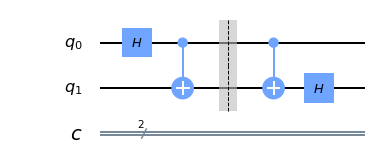

In [2]:
import qiskit.extensions.simulator

circuit = qiskit.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.snapshot('test')
circuit.cx(0,1)
circuit.h(1)

circuit.draw(output='mpl')

In [3]:
circuit.draw()

┌───┐     ┌───────┐          
q_0: ┤ H ├──■──┤0      ├──■───────
     └───┘┌─┴─┐│  test │┌─┴─┐┌───┐
q_1: ─────┤ X ├┤1      ├┤ X ├┤ H ├
          └───┘└───────┘└───┘└───┘
c_0: ═════════════════════════════
                                  
c_1: ═════════════════════════════

In [4]:
sim = Aer.get_backend('statevector_simulator')

In [5]:
sim.run(assemble(circuit)).result().data(0)

{'snapshots': {'statevector': {'test': [[(0.7071067811865476+0j),
     0j,
     0j,
     (0.7071067811865475+0j)]]}},
 'statevector': [[0.5000000000000001, 0.0],
  [0.5, 0.0],
  [0.5, 0.0],
  [0.4999999999999999, 0.0]],
 'counts': {'0x0': 1}}

Questions 
1. I need to think about how better to use a snapshot. I am not convinced we need a snapshot gate
2. we need to draw them better in a circuit. 